In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from darts import TimeSeries

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf

In [2]:
stock = 'USO' 
start = '2011-01-01' 
end = '2023-01-08'  
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


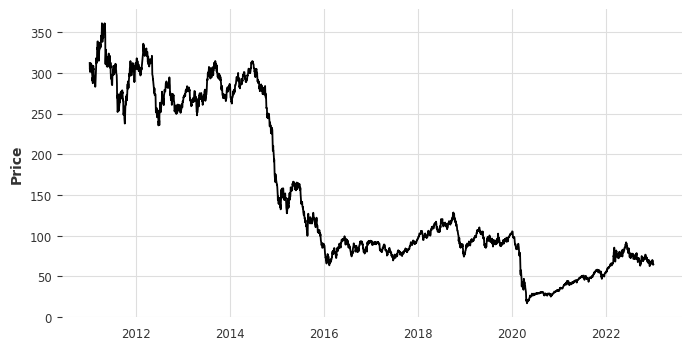

In [19]:
plt.figure(figsize=(8,4))
plt.plot(df['Close'])
plt.ylabel('Price')
plt.show()

In [20]:
dfm = df.resample('M').mean()
dfm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-31,303.212001,306.271999,300.275996,303.656000,303.656000,1.367768e+06
2011-02-28,300.256841,303.077895,296.109471,298.703159,298.703159,2.357657e+06
2011-03-31,330.215652,333.819132,327.680002,331.391304,331.391304,2.348351e+06
2011-04-30,349.512000,352.811998,346.643999,350.539999,350.539999,1.350908e+06
2011-05-31,321.961904,326.137142,316.464761,321.169521,321.169521,2.551466e+06


In [21]:
dfm = dfm.reset_index()
series = TimeSeries.from_dataframe(dfm, 'Date', 'Close')

In [22]:
train, val = series[:-240], series[-240:]

In [23]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

ValueError: Train series only contains 0 elements but ExponentialSmoothing() model requires at least 3 entries


ValueError: Train series only contains 0 elements but ExponentialSmoothing() model requires at least 3 entries

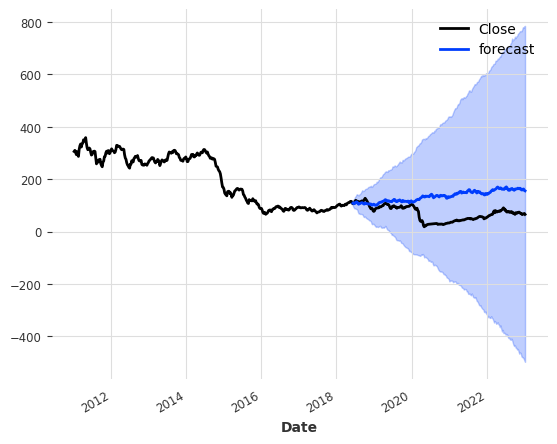

In [ ]:
series.plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()